In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
# Store filepath in a variable
file4 = "Resources/incidencepercapita.csv"
file_two = "Resources/measles.csv"

In [5]:
# Read our Data file with the pandas library
file1_df = pd.read_csv(file4, encoding="ISO-8859-1")
file_two_df = pd.read_csv(file_two, encoding="ISO-8859-1")

In [6]:
# Show just the header
file1_df.head()

,Unnamed: 0,state_name,Hepatitis A incidence_per_capita,measles incidence_per_capita,mumps incidence_per_capita,pertussis incidence_per_capita,polio incidence_per_capita,rubella incidence_per_capita,smallpox incidence_per_capita
0,0,ALABAMA,0.140114,7.358485,0.472036,1.684924,0.144214,0.264848,0.264110
1,1,ALASKA,1.666455,8.111158,0.498955,1.528616,0.167105,0.213898,0.238333
2,2,ARIZONA,0.708678,7.872509,0.426592,1.565009,0.164784,0.208534,0.230800
3,3,ARKANSAS,0.267547,8.758858,0.495492,1.666336,0.148262,0.204926,0.217637
4,4,CALIFORNIA,0.584363,7.780177,0.462301,1.579469,0.171283,0.235062,0.265513


In [7]:
#Drop columns
file2_df = file1_df.drop(columns=['Hepatitis A incidence_per_capita', 'mumps incidence_per_capita', 'pertussis incidence_per_capita', 'polio incidence_per_capita', 'rubella incidence_per_capita', 'smallpox incidence_per_capita'])
file2_df.head()

,Unnamed: 0,state_name,measles incidence_per_capita
0,0,ALABAMA,7.358485
1,1,ALASKA,8.111158
2,2,ARIZONA,7.872509
3,3,ARKANSAS,8.758858
4,4,CALIFORNIA,7.780177


In [8]:
# Set new index to state
file_three_df = file_two_df.set_index("state")
file_three_df.head()

,week,state_name,disease,cases,incidence_per_capita
state,,,,,
AL,192801,ALABAMA,MEASLES,97,3.67
AR,192801,ARKANSAS,MEASLES,76,4.11
AZ,192801,ARIZONA,MEASLES,8,1.90
CA,192801,CALIFORNIA,MEASLES,74,1.38
CO,192801,COLORADO,MEASLES,85,8.38


In [9]:
#Grab the data contained within the "AL" row and "cases" column
AL = file_three_df.loc["AL", "incidence_per_capita"]
AL.head()

state
AL     3.67
AL     6.25
AL     7.95
AL    12.58
AL     8.03
Name: incidence_per_capita, dtype: float64

In [10]:
#Grab the data contained within the "CA" row and "cases" column
CA = file_three_df.loc["CA", "incidence_per_capita"]
CA.head()

state
CA    1.38
CA    1.80
CA    1.31
CA    1.87
CA    2.38
Name: incidence_per_capita, dtype: float64

In [11]:
stats.ttest_ind(AL, CA, equal_var=False)

Ttest_indResult(statistic=-6.59862972686281, pvalue=4.485858982145973e-11)

In [12]:
# Generate some fake data to test with
def gendata(loc1=0, loc2=0):
    AL = stats.norm.rvs(loc=loc1, size=50, random_state=0)
    CA = stats.norm.rvs(loc=loc2, size=45, random_state=42)

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(AL)), AL, label="AL")
    plt.scatter(range(len(CA)), CA, label="CA")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(AL, 10, density=True, alpha=0.7, label="AL")
    plt.hist(CA, 10, density=True, alpha=0.7, label="CA")
    plt.axvline(AL.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(CA.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return AL, CA

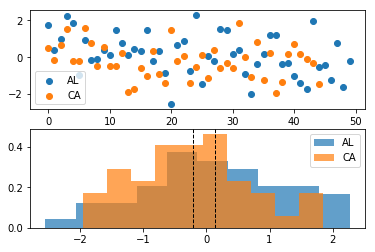

In [13]:
# Generate some data and show the scatter plot
AL, CA = gendata()

In [14]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(AL, CA, equal_var=False)

Ttest_indResult(statistic=1.680399057852556, pvalue=0.09626493123724685)

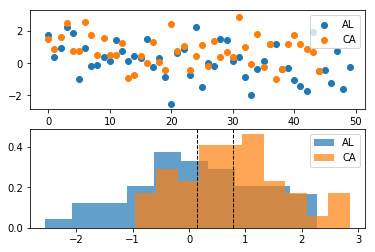

In [15]:
# Generate data with a bigger difference in means
AL, CA = gendata(loc1=0, loc2=1)

In [16]:
stats.ttest_ind(AL, CA, equal_var=False)

Ttest_indResult(statistic=-3.029216121188858, pvalue=0.0031807310798192046)